Autor: **Gabriel Leite Bessa**

Turma: **T1**

Disciplina: **Cálculo Númerico Computacional**

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from collections.abc import Callable

# Métodos

In [2]:
def lagrange_method(xs:np.array, ys:np.array, x: float) -> float:
  """
  xs -> valores de x tabelados
  ys -> valores de y tabelados
  x  -> valor a interpolar
  """
  n = xs.shape[0]
  result = 0

  for k in range(0, n):
    c = 1
    d = 1
    for j in range(0, n):
      if k != j:
        c = c * (x - xs[j])
        d = d * (xs[k] - xs[j])
    result = result + ys[k] * c / d

  return result

In [3]:
def newton_method(xs: np.array, ys: np.array, x: float) -> float:
  """
  xs -> valores de x tabelados
  ys -> valores de y tabelados
  x  -> valor a interpolar
  result -> valor interpolado
  """
  n = xs.shape[0]

  assert n > 0, "No value of xs passed"

  dely = ys.copy()

  for i in range(1, n):
    for k in range(n - 1, i - 1, -1):
      dely[k] = (dely[k] - dely[k - 1]) / (xs[k] - xs[k - i])

  result = dely[n - 1]

  for i in range(n - 2, -1, -1):
    result = result * (x - xs[i]) + dely[i]

  return result

## Integração

In [4]:
def trapaze_area(a: float, b: float, y0: float, y1: float) -> float:
  return (b - a) * (y0 + y1) / 2

In [5]:
def multiple_trapaze_area(a: float, b: float, y0: float, y1: float, function: Callable[[float], float], num_traps: int) -> float:
  result: float = 0.0
  interval: float = (b - a) / num_traps

  for i in range(0, num_traps):
    x0: float = i * interval + a
    x1: float = (i + 1) * interval + a
    result += trapaze_area(x0, x1, function(x0), function(x1))

  return result

In [6]:
def multiple_trapaze_area_inter(a: float, b: float, y0: float, y1: float, xs, ys, num_traps: int) -> float:
  result: float = 0.0
  interval: float = (b - a) / num_traps

  for i in range(0, num_traps):
    x0: float = i * interval + a
    x1: float = (i + 1) * interval + a
    result += trapaze_area(x0, x1, lagrange_method(xs, ys, x0), lagrange_method(xs, ys, x1))

  return result

In [7]:
def one_third_simpson_method(a: float, b: float, func: Callable[[float], float]) -> float:
  """
  Utiliza um polinomio de segundo grau para fazer a aproximacao da area.
  Ainda possui um certo erro associado.
  """
  x1 = (a + b) / 2
  h = x1 - a

  return (h / 3) * (func(a) + 4 * func(x1) + func(b))


In [8]:
def one_third_simpson_method_inter(a: float, b: float, xs, ys) -> float:
  x1 = (a + b) / 2
  h = x1 - a

  return (h / 3) * (lagrange_method(xs, ys, a) + 4 * lagrange_method(xs, ys, x1) + lagrange_method(xs, ys, b))

In [9]:
def error_one_third_simpson(h: float):
  pass

In [10]:
def one_third_repeted_simpson_method(a: float, b: float, func: Callable[[float], float], num_intervals: int = 1) -> float:
  h = (b - a) / num_intervals
  result = 0

  for i in range(0, num_intervals):
    result += one_third_simpson_method(a + h * i, a + h * (i + 1), func)

  return result

In [11]:
def three_eighths_simpson_method(a: float, b: float, func: Callable[[float], float]) -> float:
  """
  Utiliza um polinomio de terceiro grau para fazer a aproximacao da area
  """
  h = (b - a) / 3

  x1 = a + h
  x2 = a + 2 * h

  return (3 / 8) * h * (func(a) + 3 * func(x1) + 3 * func(x2) + func(b))

In [12]:
def error_three_eighths_simpson() -> float:
  pass

In [13]:
def three_eighths_repeted_simpson_method(a: float, b: float, func: Callable[[float], float], num_intervals: int = 1) -> float:
  h = (b - a) / num_intervals
  result = 0

  for i in range(0, num_intervals):
    result += three_eighths_simpson_method(a + h * i, a + h * (i + 1), func)

  return result

## Derivação

In [14]:
def progressive_diff(func: Callable[[float], float], x: float, h: float) -> float:
  return (func(x + h) - func(x)) / h

In [15]:
def progressive_diff_imp(func: Callable[[float], float], x: float, h: float) -> float:
  return (-1 * func(x + 2 * h) + 4 * func(x + h) - 3 * func(x)) / (2 * h)

In [16]:
def central_diff(func: Callable[[float], float], x: float, h: float) -> float:
  return (func(x + h) - func(x - h)) / (2 * h)

In [17]:
def central_diff_pts(xs: np.array, ys:np.array) -> float:
  return (xs[2] - xs[0]) / (2 * (xs[1] - xs[0]))

In [18]:
def central_diff_imp(func: Callable[[float], float], x: float, h: float) -> float:
  return ((-1 * func(x + 2 * h) + 8 * func(x + h) - 8 * func(x - h) + func(x - 2 * h))) / (12 * h)

In [19]:
def central_diff_imp(func: Callable[[float], float], x: float, h: float) -> float:
  return ((-1 * ys[4] + 8 * ys[3] - 8 * ys[1] + ys[0])) / (12 * (xs[1] - xs[0]))

In [20]:
def regressive_diff(func: Callable[[float], float], x: float, h: float) -> float:
  return (func(x) - func(x - h)) / h

In [21]:
def regressive_diff_imp(func: Callable[[float], float], x: float, h: float) -> float:
  return (3 * func(x) - 4 * func(x - h) + func(x - 2 * h)) / (2 * h)

In [22]:
def sec_central_diff(func: Callable[[float], float], x: float, h: float) -> float:
  return (func(x + h) - 2 * func(x) + func(x - 1)) / (h ** 2)

In [23]:
def sec_central_diff_imp(func: Callable[[float], float], x: float, h: float) -> float:
  return (-1 * func(x + 2 * h) + 16 * func(x + h) - 30 * func(x) + 16 * func(x - h) - func(x - 2 * h)) / (12 * h ** 2)

In [24]:
def fourth_central_diff_imp(func: Callable[[float], float], x: float, h: float) -> float:
  """
  Quero implementar mas nao faco ideia de como resolver isso
  """
  pass

In [25]:
def euler_method(a: float,
                 b: float,
                 func: Callable[[float, float], float],
                 y0: float,
                 h: float,
                 save_hist: bool = False) -> tuple[float, dict]:
  """
  Calculates the derivative numerically with Euler method

  a -> bottom limit
  b -> upper limit
  func -> function to derivate
  y0 -> first y solution
  h -> step size
  """

  history = {"x": list(), "y": list()}

  x = a
  y = y0

  if save_hist:
    history["x"].append(x)
    history["y"].append(y)

  fxy = func(x, y)

  for i in range(1, round((b - a) / h) + 1):
    x = a + i * h
    y = y + h * fxy
    fxy = func(x, y)

    if save_hist:
      history["x"].append(x)
      history["y"].append(y)

  return (y, history)

In [61]:
def euler_method_pts(xs: list[float],
                 ys: list[float],
                 save_hist: bool = False) -> tuple[float, dict]:
  """
  Calculates the derivative numerically with Euler method

  a -> bottom limit
  b -> upper limit
  func -> function to derivate
  y0 -> first y solution
  h -> step size
  """

  history = {"x": list(), "y": list()}

  x = xs[0]
  y = ys[0]

  fxy = y

  for i in range(1, round((xs[-1] - xs[0]) / (xs[1] - xs[0])) + 1):
    x = xs[0] + i * (xs[1] - xs[0])
    y = y + (xs[1] - xs[0]) * fxy
    fxy = ys[i]

    if save_hist:
      history["x"].append(x)
      history["y"].append(y)

  return (y, history)

In [26]:
def runge_kutta_2_method(a: float,
                         b: float,
                         func: Callable[[float, float], float],
                         y0: float,
                         h: float,
                         save_hist: bool = False) -> tuple[float, dict]:

  history = {"x": list(), "y": list(), "k1": list(), "k2": list()}

  x = a
  y = y0
  k1 = func(x, y)
  k2 = func(x + h, y + h * k1)

  if save_hist:
    history["x"].append(x)
    history["y"].append(y)
    history["k1"].append(k1)
    history["k2"].append(k2)

  for i in range(1, round((b - a) / h) + 1):
    x = a + i * h
    y = y + h * (k1 + k2) / 2
    k1 = func(x, y)
    k2 = func(x + h, y + h * k1)

    if save_hist:
      history["x"].append(x)
      history["y"].append(y)
      history["k1"].append(k1)
      history["k2"].append(k2)

  return (y, history)

In [27]:
def runge_kutta_4_method(a: float,
                         b: float,
                         func: Callable[[float, float], float],
                         y0: float,
                         h: float,
                         save_hist: bool = False) -> tuple[float, dict]:
  history = {"x": list(), "y": list(), "k1": list(), "k2": list(), "k3": list(), "k4": list()}

  x = a
  y = y0
  k1 = func(x, y)
  k2 = func(x + h / 2, y + h / 2 * k1)
  k3 = func(x + h / 2, y + h / 2 * k2)
  k4 = func(x + h, y + h * k3)

  if save_hist:
    history["x"].append(x)
    history["y"].append(y)
    history["k1"].append(k1)
    history["k2"].append(k2)
    history["k3"].append(k3)
    history["k4"].append(k4)

  for i in range(1, round((b - a) / h) + 1):
    x = a + i * h
    y = y + h * (k1 + 2 * k2 + 2 * k3 + k4) / 6
    k1 = func(x, y)
    k2 = func(x + h / 2, y + h / 2 * k1)
    k3 = func(x + h / 2, y + h / 2 * k2)
    k4 = func(x + h, y + h * k3)

    if save_hist:
      history["x"].append(x)
      history["y"].append(y)
      history["k1"].append(k1)
      history["k2"].append(k2)
      history["k3"].append(k3)
      history["k4"].append(k4)

  return (y, history)

# Testes

In [ ]:
f1 = lambda x: x**4 + x

print(trapaze_area(1, 3, f1(1), f1(3)))
print(one_third_simpson_method(1, 3, f1))
print(one_third_repeted_simpson_method(1, 3, f1, 10))
print(three_eighths_simpson_method(1, 3, f1))
print(three_eighths_repeted_simpson_method(1, 3, f1, 10))

86.0
52.666666666666664
52.400026666666676
52.518518518518505
52.40001185185184


In [ ]:
f2 = lambda x: 7 * x ** 2
print(central_diff_imp(f2, 1, 0.01))
print(sec_central_diff_imp(f2, 2, 0.01))
print(regressive_diff_imp(f2, 1, 0.01))
print(progressive_diff_imp(f2, 1, 0.01))

In [ ]:
f1 = lambda x, y: -1 * x * y
result, hist = euler_method(0, 1, f1, 1, 0.1, True)
print(result)
result, hist = runge_kutta_2_method(0, 1, f1, 1, 0.1, True)
print(result)
result, hist = runge_kutta_4_method(0, 1, f1, 1, 0.1, True)
print(result)

0.6281565095552948
0.6036843579217701
[0, 0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9, 1.0]
0.6035056417649355


# Relatório 4

## Exercício 1


Uma corrida tem duas fases distintas: na primeira, a fase mais curta, o
movimento do carro é perfeitamente não determinístico, dependendo das
derrapagens e da forma como o condutor consegue dominar o carro. Na segunda
fase, o carro tem um movimento muito rápido, cuja aceleração está
perfeitamente definida.

Considere a prova do condutor X de duração 7,5 s. Na primeira fase os valores
da aceleração em cada instante encontram-se na tabela abaixo.

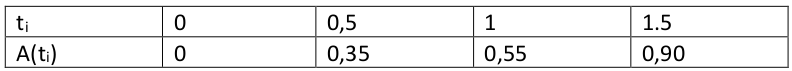

Na segunda fase da corrida a aceleração é definida pela seguinte expressão:

a(t) = 0,5 * t ** 2 - 0,15 * t para t ∈ [1,5; 7,5]

### a) Estime a velocidade na primeira fase da corrida, utilizando a fórmula da integração mais adequada.

In [30]:
xs = np.array([0, 0.5, 1, 1.5], dtype=np.float32)
ys = np.array([0, 0.35, 0.55, 0.90], dtype=np.float32)

result = multiple_trapaze_area_inter(0, 0.5, 0, 0.35, xs, ys,  1) + multiple_trapaze_area_inter(0.5, 1, 0.35, 0.55, xs, ys, 1) + multiple_trapaze_area_inter(1, 1.5, 0.55, 0.90, xs, ys, 1)
print(f"Velocidade na primeira fase da corrida: {round(result, 6)}")

Velocidade na primeira fase da corrida: 0.675


### b) Estime a velocidade na segunda fase da corrida, utilizando a fórmula repetida do Trapézio com erro de truncamento em valor absoluto inferior a 0,3.

In [31]:
def abs_error(pred, truth):
  return round(abs(pred - truth) / abs(truth), 1)

In [32]:
f = lambda x: 0.5 * (x ** 2) - 0.15 * x

iter = 2
result = multiple_trapaze_area(1.5, 7.5, f(1.5), f(7.5), f, iter)

while (abs_error(result, 65.7) >= 0.3):
  iter += 1
  result = multiple_trapaze_area(1.5, 7.5, f(1.5), f(7.5), f, iter)

print(f"Velocidade na segunda fase da corrida: {result} - obtida na iteração {iter}")

Velocidade na segunda fase da corrida: 70.2 - obtida na iteração 2


## Exercício 2


A disciplina de Cálculo Numérico Computacional de um curso de Computação no
ano letivo 2022/2 teve 92 alunos inscritos. Inicialmente, um grupo de 10 alunos
resolveu lançar o boato de que o exame iria ser cancelado.
Em média cada estudante conversa com outros colegas a uma taxa de 2
estudantes/hora, podendo estes já saberem ou não da novidade. Se y
representar o número de estudantes que sabem do boato no instante de tempo
t (horas) então a taxa de recepção do boato é dada por:

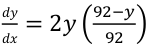

Utilizando o método mais adequado que estudou, calcule o número de
estudantes que após 3 horas tomou conhecimento do boato (use h = 1).

In [35]:
f = lambda x, y: 2 * y * ((92 - y) / (92))

result, history = runge_kutta_2_method(0, 3, f, 10, 1, save_hist=True)
print(f"O número de estudantes com conhecimento sobre o boato após 3 horas é: {math.trunc(result)}")

O número de estudantes com conhecimento sobre o boato após 3 horas é: 73


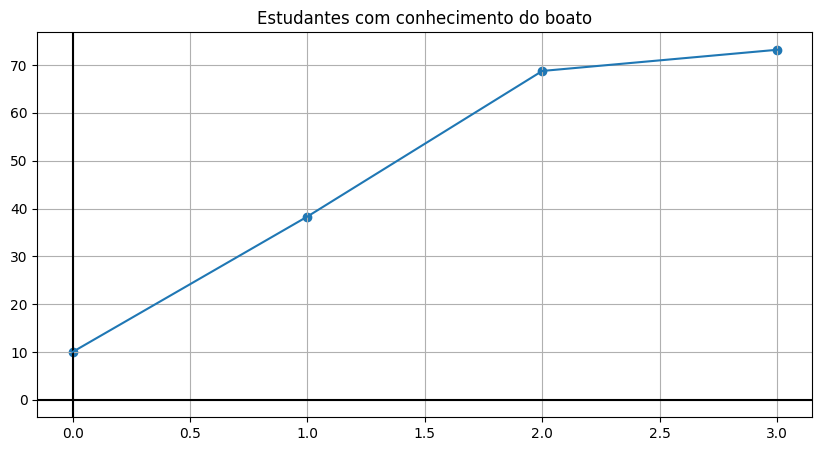

In [46]:
plt.figure(figsize=(10,5))
plt.grid()
plt.title("Estudantes com conhecimento do boato")
plt.axhline(y = 0, color="black")
plt.axvline(x = 0, color="black")
plt.scatter(history["x"], history["y"])
plt.plot(history["x"], history["y"])
plt.show()

### Conclusão

Foi utilizado o método de Runge Kutta de 2 ordem neste exercício para possível melhor precisão que o método de Euler, poderia ter sido aplicado o método de Runge Kutta de 4 ordem também.

## Exercício 3


A coleta de dados sobre a temperatura em relação à posição para alguns corpos
de prova, apresentaram os seguintes cenários:

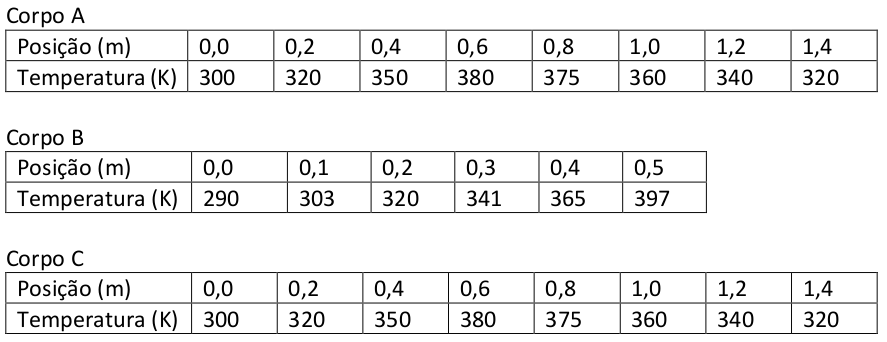

Obtenha a temperatura média para cada um dos corpos. Para a integração
numérica, utilize as regras do Trapézio e de 1/3 de Simpson.

In [79]:
a_xs = np.array([0,0.2,0.4,0.6,0.8,1.0,1.2,1.4], dtype=np.float32)
a_ys = np.array([300,320,350,380,375,360,340,320], dtype=np.float32)

print(f"Temperatura média do corpo A por Trapézio Repetido: {multiple_trapaze_area_inter(0.0, 1.4, 300, 320, a_xs, a_ys, 100)}")
print(f"Temperatura média do corpo A por 1/3 de Simpson: {one_third_simpson_method_inter(0.0, 1.4, a_xs, a_ys)}\n")

b_xs = np.array([0,0.1,0.2,0.3,0.4,0.5], dtype=np.float32)
b_ys = np.array([290,303,320,341,365,397], dtype=np.float32)

print(f"Temperatura média do corpo B por Trapézio Repetido: {multiple_trapaze_area_inter(0.0, 1.4, 300, 320, b_xs, b_ys, 100)}")
print(f"Temperatura média do corpo B por 1/3 de Simpson: {one_third_simpson_method_inter(0.0, 1.4, b_xs, b_ys)}\n")

print(f"Temperatura média do corpo C por Trapézio Repetido: {multiple_trapaze_area_inter(0.0, 1.4, 300, 320, a_xs, a_ys, 100)}")
print(f"Temperatura média do corpo C por 1/3 de Simpson: {one_third_simpson_method_inter(0.0, 1.4, a_xs, a_ys)}\n")

Temperatura média do corpo A por Trapézio Repetido: 487.92627749517527
Temperatura média do corpo A por 1/3 de Simpson: 500.2106079563294

Temperatura média do corpo B por Trapézio Repetido: 3203.600611807153
Temperatura média do corpo B por 1/3 de Simpson: 3837.601210802924

Temperatura média do corpo C por Trapézio Repetido: 487.92627749517527
Temperatura média do corpo C por 1/3 de Simpson: 500.2106079563294



## Exercício 4


Acompanhando-se a trajetória de algumas partículas, obtiveram-se os seguintes
resultados em função do tempo:

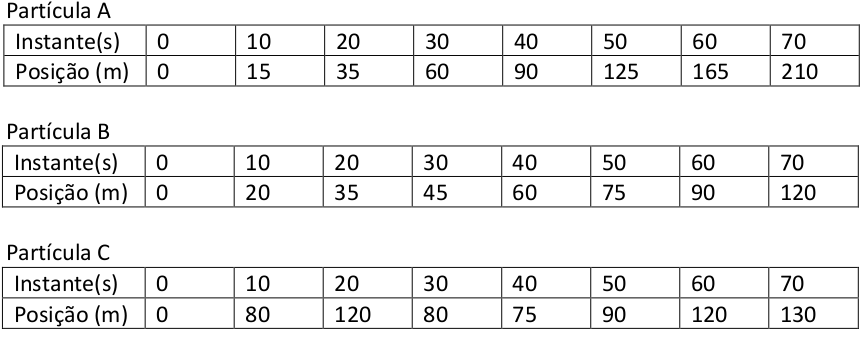

Obtenha estimativas para a velocidade e a aceleração de cada partícula para
cada instante de tempo. Utilize expressões para as derivadas numéricas de
primeira ordem.

In [101]:
# derivada de pos x tempo => velocidade
# derivada de vel x tempo => aceleração
# segunda derivade de pos x tempo => aceleração

xs = np.array([ i for i in range(0, 80, 10)], dtype=np.float32)
a_ys = np.array([0, 15, 35, 60, 90, 125, 165, 210], dtype=np.float32)
b_ys = np.array([0, 20, 35, 45, 60, 75, 90, 120], dtype=np.float32)
c_ys = np.array([0, 80, 120, 80, 75, 90, 120, 130], dtype=np.float32)

a_vel = np.array(euler_method_pts(xs, a_ys, save_hist=True)[1]["y"], dtype=np.float32)
b_vel = np.array(euler_method_pts(xs, b_ys, save_hist=True)[1]["y"], dtype=np.float32)
c_vel = np.array(euler_method_pts(xs, c_ys, save_hist=True)[1]["y"], dtype=np.float32)

print(f"Velocidades:")
print()
print(f"Tempo x Velocidade partícula A:")
for t, a in zip(xs[:-1], a_vel):
  print(f"{t} \t-> \t{a}")

print()
print(f"Tempo x Velocidade partícula B:")
for t, a in zip(xs[:-1], b_vel):
  print(f"{t} \t-> \t{a}")

print()
print(f"Tempo x Velocidade partícula C:")
for t, a in zip(xs[:-1], c_vel):
  print(f"{t} \t-> \t{a}")

a_acel = np.array(euler_method_pts(xs[:-1], a_vel, save_hist=True)[1]["y"], dtype=np.float32)
b_acel = np.array(euler_method_pts(xs[:-1], b_vel, save_hist=True)[1]["y"], dtype=np.float32)
c_acel = np.array(euler_method_pts(xs[:-1], c_vel, save_hist=True)[1]["y"], dtype=np.float32)

print()
print("Acelerações:")
print()
print(f"Tempo x Aceleração partícula A:")
for t, a in zip(xs[:-2], a_acel):
  print(f"{t} \t-> \t{a}")

print()
print(f"Tempo x Aceleração partícula B:")
for t, a in zip(xs[:-2], b_acel):
  print(f"{t} \t-> \t{a}")

print()
print(f"Tempo x Aceleração partícula C:")
for t, a in zip(xs[:-2], c_acel):
  print(f"{t} \t-> \t{a}")

Velocidades:

Tempo x Velocidade partícula A:
0.0 	-> 	0.0
10.0 	-> 	150.0
20.0 	-> 	500.0
30.0 	-> 	1100.0
40.0 	-> 	2000.0
50.0 	-> 	3250.0
60.0 	-> 	4900.0

Tempo x Velocidade partícula B:
0.0 	-> 	0.0
10.0 	-> 	200.0
20.0 	-> 	550.0
30.0 	-> 	1000.0
40.0 	-> 	1600.0
50.0 	-> 	2350.0
60.0 	-> 	3250.0

Tempo x Velocidade partícula C:
0.0 	-> 	0.0
10.0 	-> 	800.0
20.0 	-> 	2000.0
30.0 	-> 	2800.0
40.0 	-> 	3550.0
50.0 	-> 	4450.0
60.0 	-> 	5650.0

Acelerações:

Tempo x Aceleração partícula A:
0.0 	-> 	0.0
10.0 	-> 	1500.0
20.0 	-> 	6500.0
30.0 	-> 	17500.0
40.0 	-> 	37500.0
50.0 	-> 	70000.0

Tempo x Aceleração partícula B:
0.0 	-> 	0.0
10.0 	-> 	2000.0
20.0 	-> 	7500.0
30.0 	-> 	17500.0
40.0 	-> 	33500.0
50.0 	-> 	57000.0

Tempo x Aceleração partícula C:
0.0 	-> 	0.0
10.0 	-> 	8000.0
20.0 	-> 	28000.0
30.0 	-> 	56000.0
40.0 	-> 	91500.0
50.0 	-> 	136000.0


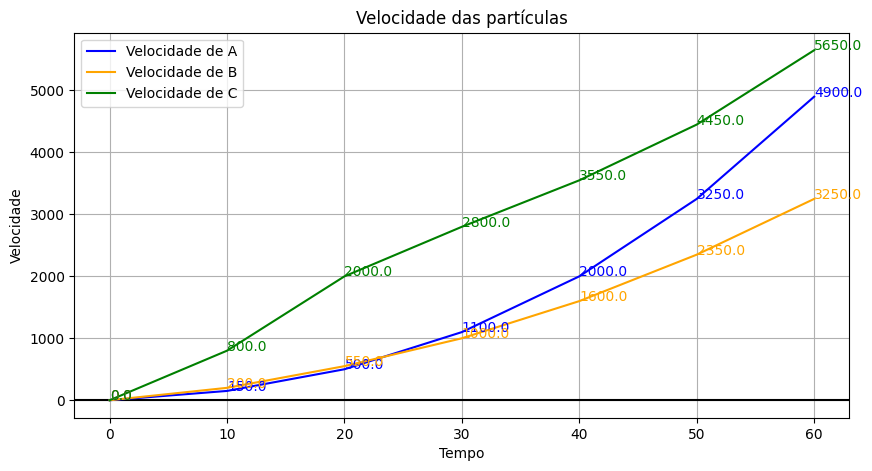

In [93]:
fig, ax = plt.subplots(figsize=(10,5))
plt.grid()
plt.title("Velocidade das partículas")
plt.axhline(y = 0, color="black")
plt.plot(xs[:-1], a_vel, label="Velocidade de A", color='blue')
plt.plot(xs[:-1], b_vel, label="Velocidade de B", color='orange')
plt.plot(xs[:-1], c_vel, label="Velocidade de C", color='green')
plt.xlabel("Tempo")
plt.ylabel("Velocidade")
plt.legend()

for i, note in enumerate(a_vel):
  ax.annotate(note, (xs[i], a_vel[i]), color='blue')

for i, note in enumerate(b_vel):
  ax.annotate(note, (xs[i], b_vel[i]), color='orange')

for i, note in enumerate(c_vel):
  ax.annotate(note, (xs[i], c_vel[i]), color='green')

plt.show()

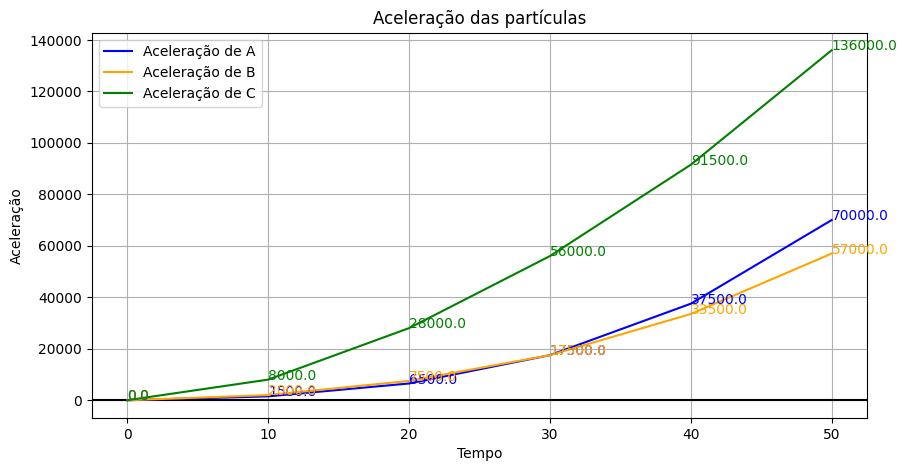

In [94]:
fig, ax = plt.subplots(figsize=(10,5))
plt.grid()
plt.title("Aceleração das partículas")
plt.axhline(y = 0, color="black")
plt.plot(xs[:-2], a_acel, label="Aceleração de A", color='blue')
plt.plot(xs[:-2], b_acel, label="Aceleração de B", color='orange')
plt.plot(xs[:-2], c_acel, label="Aceleração de C", color='green')
plt.xlabel("Tempo")
plt.ylabel("Aceleração")
plt.legend()

for i, note in enumerate(a_acel):
  ax.annotate(note, (xs[i], a_acel[i]), color='blue')

for i, note in enumerate(b_acel):
  ax.annotate(note, (xs[i], b_acel[i]), color='orange')

for i, note in enumerate(c_acel):
  ax.annotate(note, (xs[i], c_acel[i]), color='green')

plt.show()